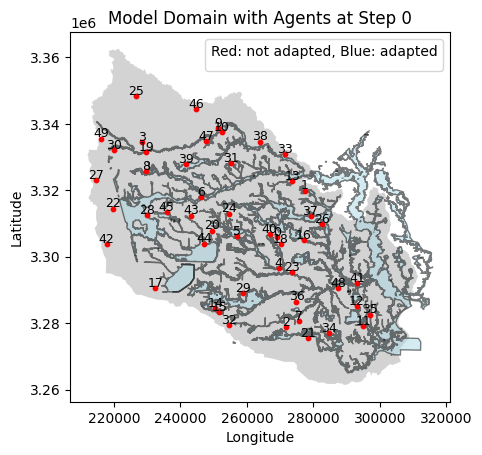

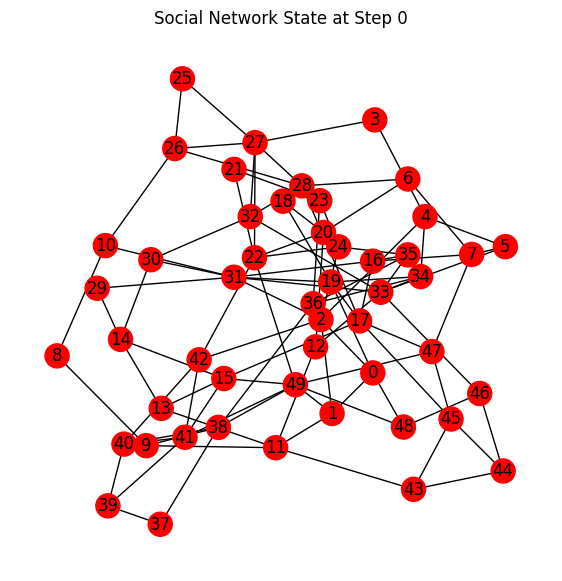

<Figure size 1000x600 with 0 Axes>

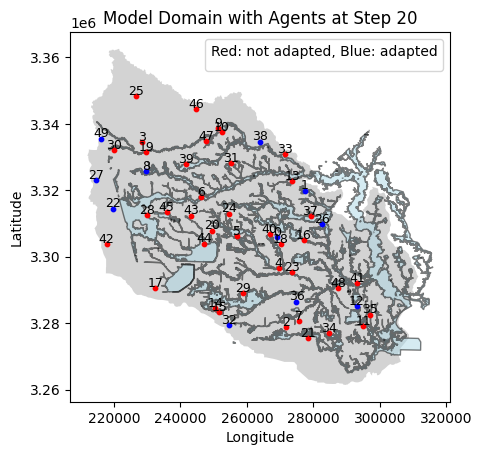

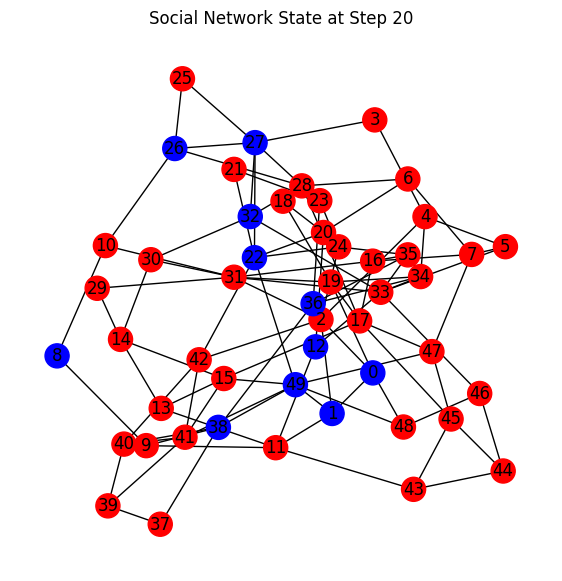

<Figure size 1000x600 with 0 Axes>

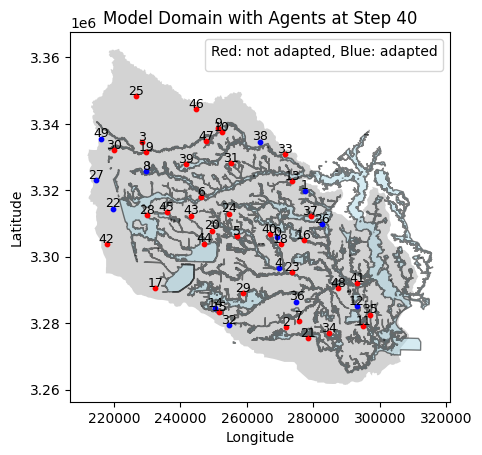

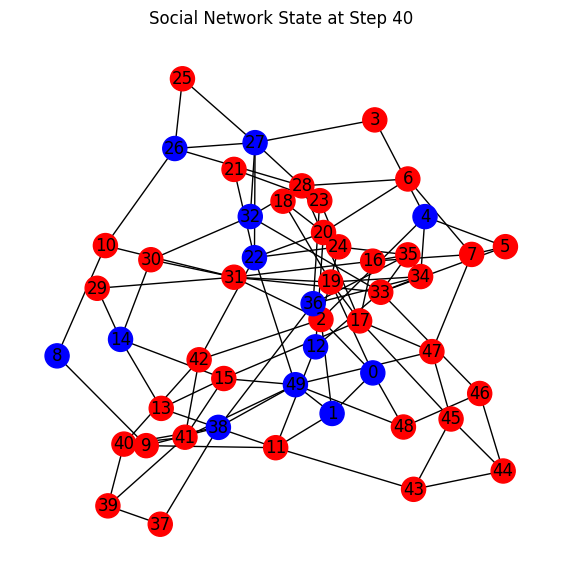

<Figure size 1000x600 with 0 Axes>

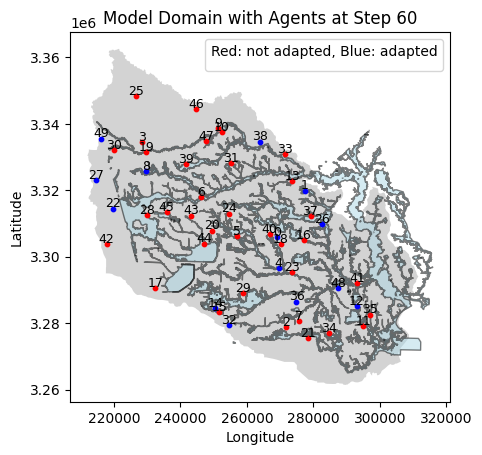

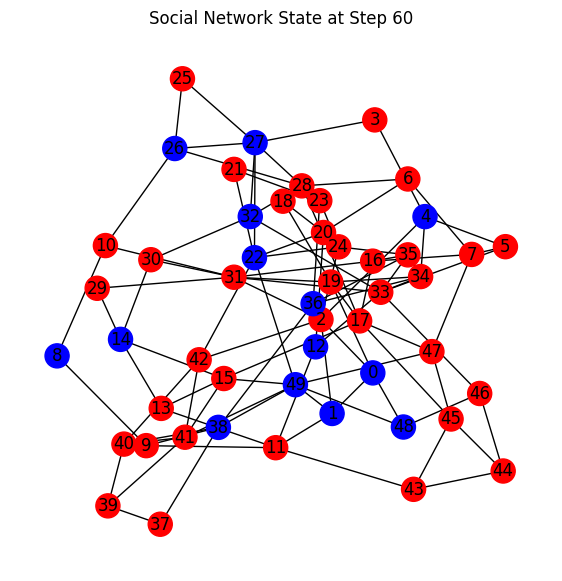

<Figure size 1000x600 with 0 Axes>

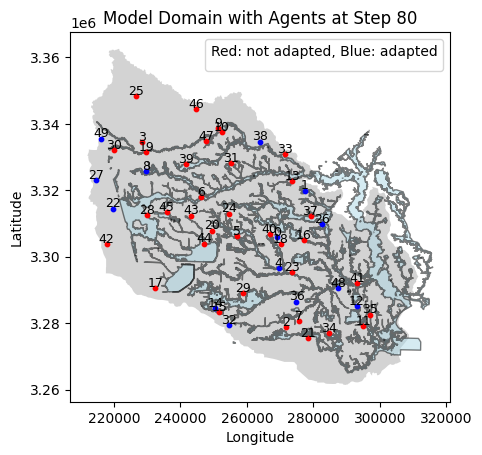

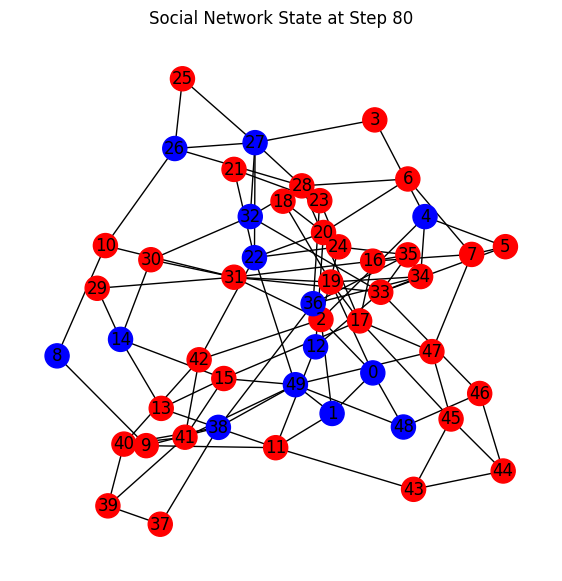

<Figure size 1000x600 with 0 Axes>

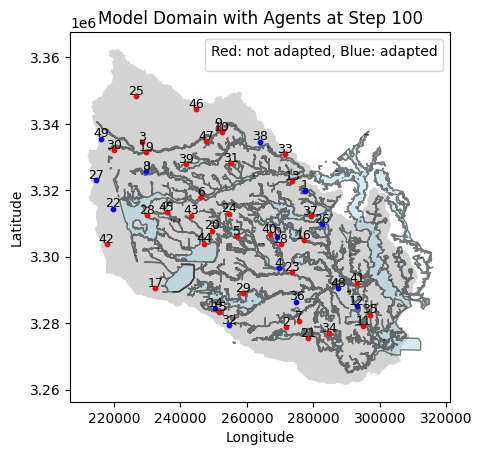

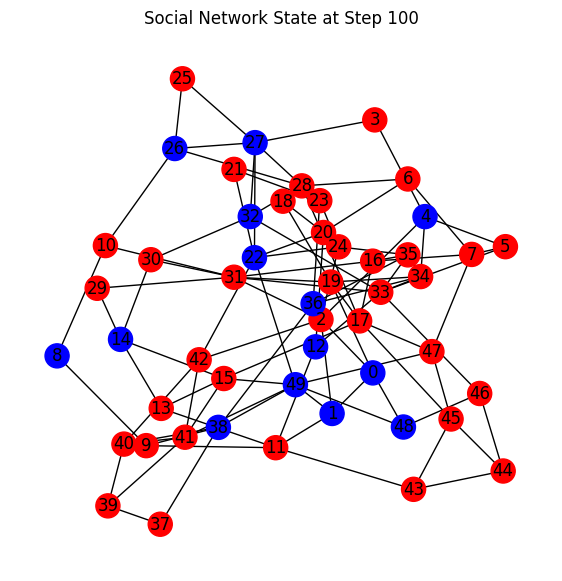

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import functions as f

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="500yr", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(100):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 20 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()


In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data  


FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.236063              0.396238               0.0   
     1                   1.067772              0.659749               0.0   
     2                   0.000000              0.000000               0.0   
     3                   0.000000              0.000000               0.0   
     4                   5.755128              0.953866               0.0   
...                           ...                   ...               ...   
99   45                  0.000000              0.000000               0.0   
     46                  0.000000              0.000000               0.0   
     47                  0.000000              0.000000               0.0   
     48                  0.000000              0.000000              -1.0   
     49                  0.000000              0.000000              -1.0   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID                                               
0    0                      0.0      False             4   
     1                      0.0      False             4   
     2                      0.0      False             6   
     3                      0.0      False             2   
     4                      0.0      False             4   
...                         ...        ...           ...   
99   45                     0.0      False             4   
     46                     0.0      False             3   
     47                     0.0      False             4   
     48                     0.0       True             3   
     49                     0.0       True             7   

                                                   location   opinion  \
Step AgentID                                                            
0    0         POINT (268961.6215338098 3305862.5452621994)  0.804553   
     1        POINT (277506.83067603176 3319916.0854165293)  0.565179   
     2          POINT (271878.2452903896 3278767.613953733)  0.117415   
     3        POINT (228336.62820104696 3334547.1116770147)  0.511118   
     4          POINT (269559.1113192148 3296596.081452077)  0.923975   
...                                                     ...       ...   
99   45         POINT (235807.7688118538 3313542.192238729)  0.503390   
     46       POINT (244745.27626574406 3344372.2699669437)  0.299227   
     47         POINT (247813.997111317 3334912.5629098713)  0.434986   
     48        POINT (287426.56509922986 3290613.428001163)  0.599703   
     49         POINT (216169.3945805538 3335597.825619362)  0.591198   

                 savings    income  ...  trait_diff  opinion_diff  \
Step AgentID                        ...                             
0    0          9986.000  2097.060  ...         NaN           NaN   
     1         32790.000  2459.250  ...         NaN           NaN   
     2         48674.000  3650.550  ...         NaN           NaN   
     3         98346.000  7375.950  ...         NaN           NaN   
     4         47072.000  3530.400  ...         NaN           NaN   
...                  ...       ...  ...         ...           ...   
99   45       758637.550  6753.450  ...    0.068433     -0.039669   
     46       710185.375  6322.125  ...   -0.060693      0.055178   
     47       755975.250  6729.750  ...   -0.019480      0.093469   
     48       207426.800  2149.200  ...    0.096464     -0.013790   
     49       365064.975  3687.525  ...    0.051370      0.055121   

              financial_diff  w_friends  external_influence  flood_opinion  \
Step AgentID                                                                 
0    0                   NaN        NaN                 NaN            0.0   
     1                   NaN        NaN                 NaN            0.0   
     2                   NaN        NaN                 NaN            

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,5
2,8
3,9
4,10
...,...
95,14
96,14
97,14
98,14


In [4]:
agent_data.index[:0]

MultiIndex([], names=['Step', 'AgentID'])

In [5]:
filtered_data = agent_data.xs(29, level='AgentID')
filtered_data

,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IsAdapted,FriendsCount,location,opinion,savings,income,...,trait_diff,opinion_diff,financial_diff,w_friends,external_influence,flood_opinion,w_ext,w_financial,w_trait,adapted_time
Step,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.494635,55750.00,4181.25,...,NaN,NaN,NaN,NaN,NaN,0.0,0.2,0.2,0.2,NaN
1,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.468134,59931.25,4181.25,...,0.006625,-0.086879,-0.098927,0.633089,0.152679,0.0,0.2,0.2,0.2,NaN
2,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.309588,64112.50,4181.25,...,0.046262,-0.070101,-0.093627,0.633089,-0.041079,0.0,0.2,0.2,0.2,NaN
3,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.343563,68293.75,4181.25,...,0.037768,-0.026439,-0.061918,0.633089,0.084564,0.0,0.2,0.2,0.2,NaN
4,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.275913,72475.00,4181.25,...,0.054680,-0.123939,-0.068713,0.633089,0.070321,0.0,0.2,0.2,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.249109,452968.75,4181.25,...,0.061382,-0.009150,-0.034459,0.633089,0.059040,0.0,0.2,0.2,0.2,NaN
96,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.334210,457150.00,4181.25,...,0.040106,-0.057779,-0.049822,0.633089,0.152595,0.0,0.2,0.2,0.2,NaN
97,0.0,0.0,0.0,0.0,False,2,POINT (258772.4260022141 3289151.3350844807),0.252065,461331.25,4181.25,...,0.060643,-0.018080,-0.066842,0.633089,-0.057866,0.0,0.2,0.2,0.2,NaN


In [6]:
total_dmg = agent_data['FloodDamageActual'].sum()
total_dmg

228.2390481503799

In [17]:
data_99 = agent_data.xs(99, level='Step')
data_99['adapted_time'].mean()

9.357142857142858